In [3]:
import kagglehub

path = kagglehub.dataset_download("hernan4444/anime-recommendation-database-2020")

/Users/admin/Desktop/MAI/Third/ml/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/admin/Desktop/MAI/Third/ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd

anime = pd.read_csv(path + '/anime.csv')
ratings = pd.read_csv(path + '/rating_complete.csv')
anime_list = pd.read_csv(path + '/animelist.csv')
status = pd.read_csv(path + '/watching_status.csv')

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [21]:
anime.head(7)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0
6,16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",Spring 2005,...,11829.0,16309.0,20008.0,13062.0,5574.0,3148.0,1339.0,484.0,278.0,321.0


In [22]:
ratings.head(7)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
5,0,431,8
6,0,578,10


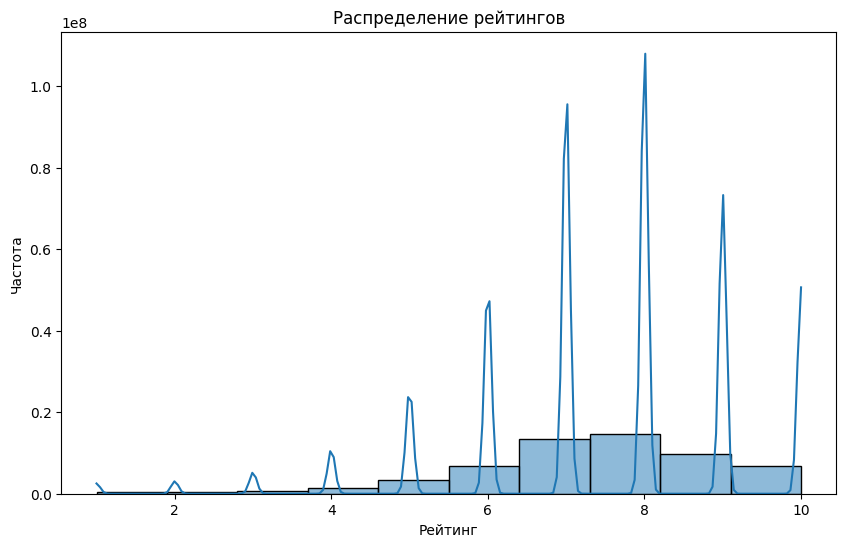

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()


Делаем вывод о том, что плохие оценки ставят реже, да и практически не ставят

In [9]:
ratings.rating.value_counts()

rating
8     14642156
7     13325549
9      9773857
6      6849293
10     6716048
5      3436250
4      1455102
3       696048
2       405556
1       333419
Name: count, dtype: int64

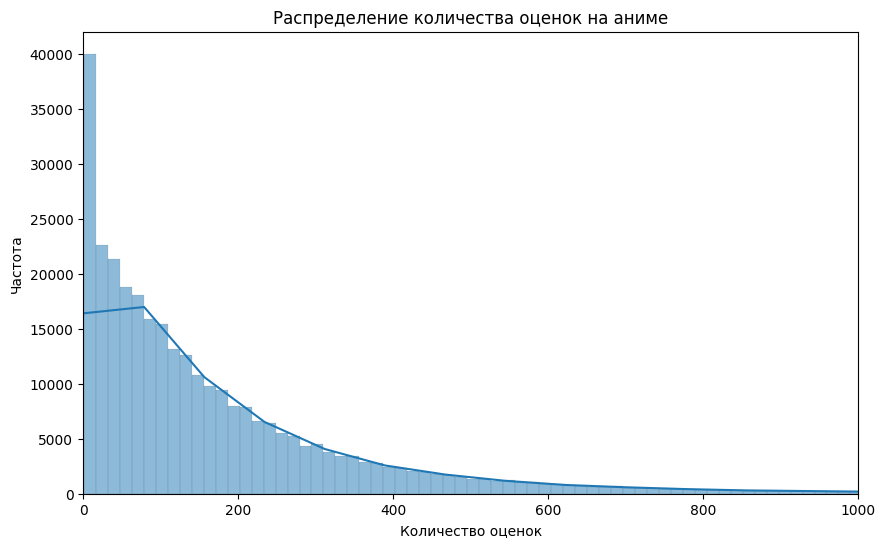

In [10]:
user_ratings_count = ratings.groupby('user_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=1000, kde=True)
plt.xlim(0, 1000)
plt.title('Распределение количества оценок на аниме')
plt.xlabel('Количество оценок')
plt.ylabel('Частота')
plt.show()

Можем уверенно сказать, что датасет полный, ведь в нем большое количество активных юзеров, которые ставят оценки

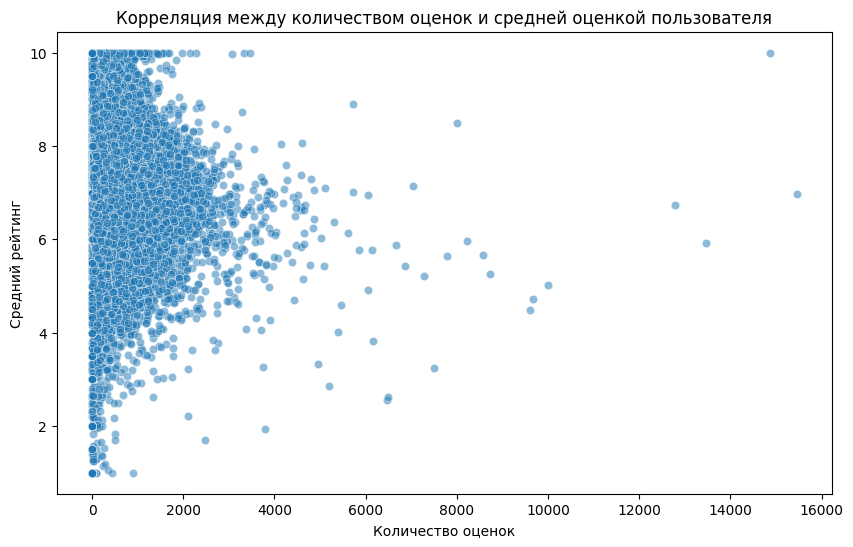

In [11]:
user_ratings_count = ratings.groupby('user_id').size()
user_avg_rating = ratings.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_ratings_count, y=user_avg_rating, alpha=0.5)
plt.title('Корреляция между количеством оценок и средней оценкой пользователя')
plt.xlabel('Количество оценок')
plt.ylabel('Средний рейтинг')
plt.show()

Чем больше оценок ставит пользователь, тем меньше его средняя оценка

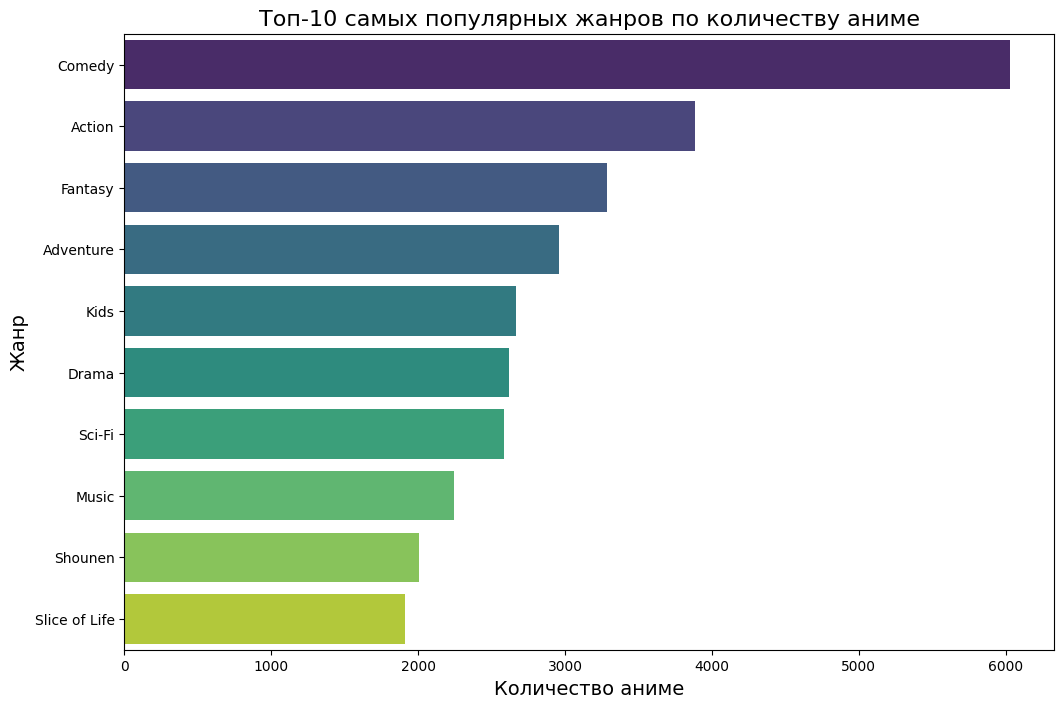

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

genre_list = anime['Genres'].str.split(', ').explode()

# Подсчитаем количество аниме для каждого жанра
genre_counts = genre_list.value_counts().head(10)  # Топ-10 жанров по количеству аниме

# Строим график
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Топ-10 самых популярных жанров по количеству аниме', fontsize=16)
plt.xlabel('Количество аниме', fontsize=14)
plt.ylabel('Жанр', fontsize=14)
plt.show()


Видно, что жанр комедии самый популярный в сьемке

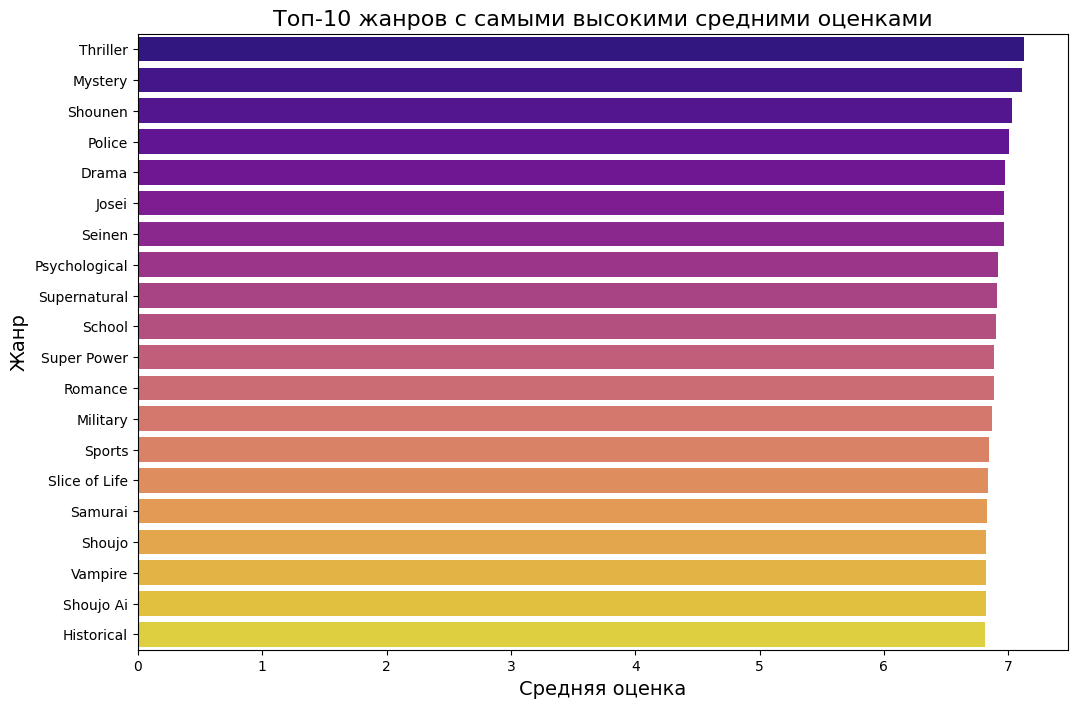

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')

genre_list = anime['Genres'].str.split(', ').explode()

genre_scores = pd.concat([genre_list, anime['Score'].repeat(genre_list.groupby(level=0).size())], axis=1)

genre_scores.columns = ['Genre', 'Score']

average_genre_scores = genre_scores.groupby('Genre')['Score'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_genre_scores.values, y=average_genre_scores.index, palette='plasma')
plt.title('Топ-10 жанров с самыми высокими средними оценками', fontsize=16)
plt.xlabel('Средняя оценка', fontsize=14)
plt.ylabel('Жанр', fontsize=14)
plt.show()


Видно, что в целом средние оценки очень схожи между разными жанрами

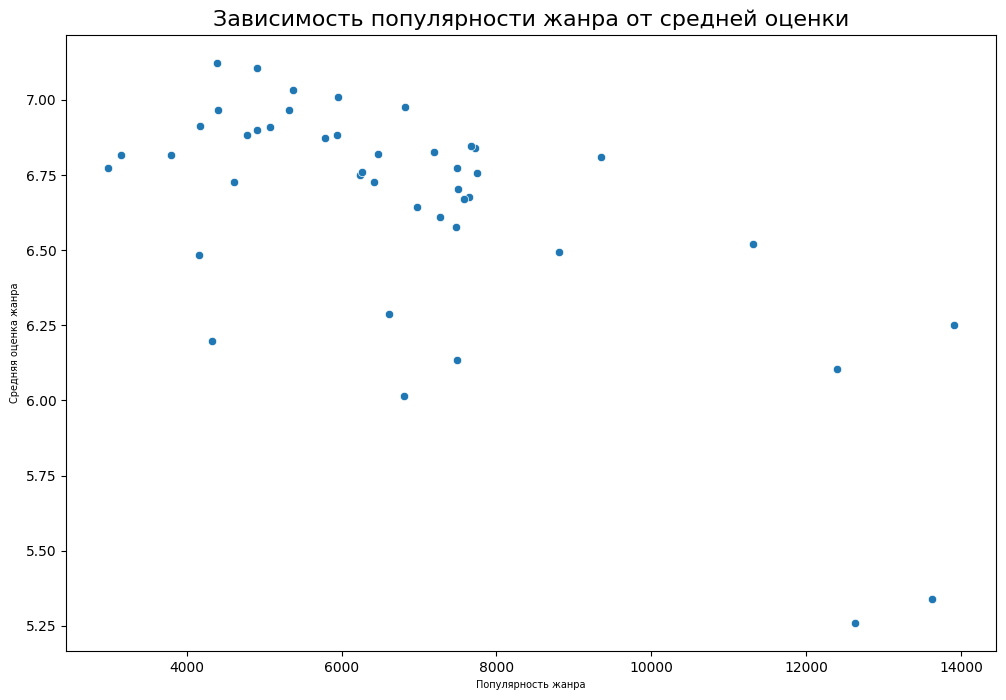

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')

genre_list = anime['Genres'].str.split(', ').explode()

popularity_list = anime['Popularity'].repeat(genre_list.groupby(level=0).size())

genre_data = pd.concat([genre_list, popularity_list, anime['Score'].repeat(genre_list.groupby(level=0).size())], axis=1)

genre_data.columns = ['Genre', 'Popularity', 'Score']

genre_summary = genre_data.groupby('Genre').agg({'Popularity': 'mean', 'Score': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=genre_summary, x='Popularity', y='Score', sizes=(50, 200))
plt.title('Зависимость популярности жанра от средней оценки', fontsize=16)
plt.xlabel('Популярность жанра', fontsize=7)
plt.ylabel('Средняя оценка жанра', fontsize=7)
plt.show()


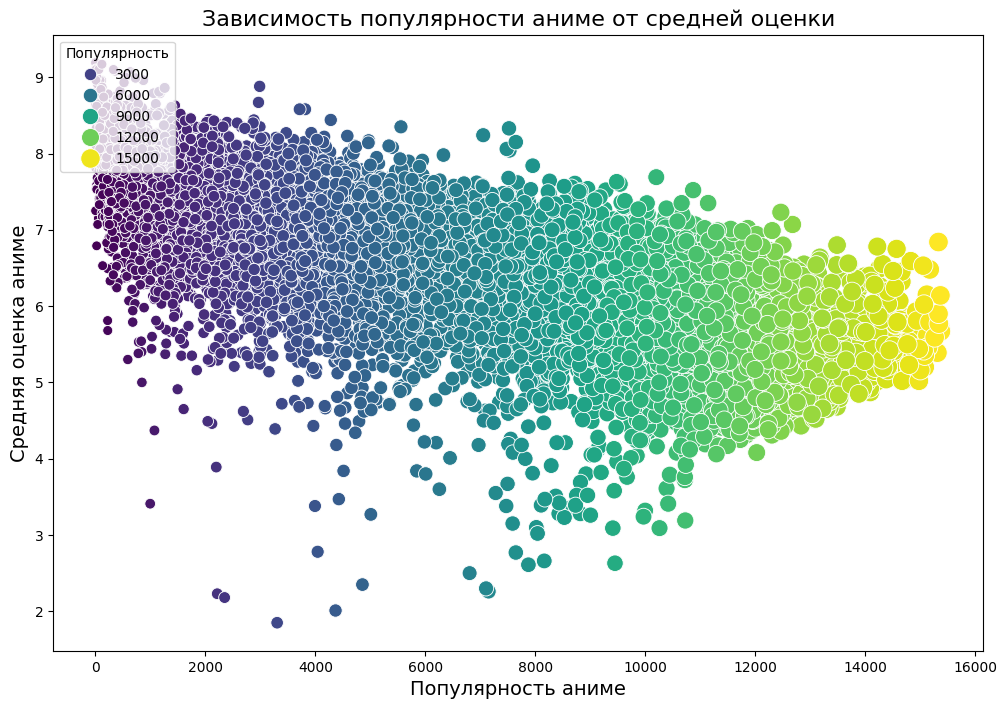

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем столбец 'Score' в числовой формат
anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')

# Для каждого аниме считаем среднюю оценку (можно использовать ratings DataFrame, если оценки отдельно)
# Для упрощения, если у нас уже есть рейтинг аниме, мы берем их из anime:
# Если у вас есть DataFrame с рейтингами, например, rating_df, то нужно будет его объединить.

# Например, если оценки (ratings) есть в отдельном DataFrame:
ratings_agg = ratings.groupby('anime_id').agg(mean_rating=('rating', 'mean')).reset_index()

# Здесь мы предполагаем, что средняя оценка уже есть в столбце 'Score' в anime

# Берем популярность и среднюю оценку для каждого аниме
anime_data = anime[['Name', 'Popularity', 'Score']]

# Фильтруем аниме с достаточным количеством оценок, если необходимо
anime_data = anime_data[anime_data['Score'].notna()]

# Строим график зависимости популярности от средней оценки
plt.figure(figsize=(12, 8))
sns.scatterplot(data=anime_data, x='Popularity', y='Score', hue='Popularity', palette='viridis', size='Popularity', sizes=(50, 200))
plt.title('Зависимость популярности аниме от средней оценки', fontsize=16)
plt.xlabel('Популярность аниме', fontsize=14)
plt.ylabel('Средняя оценка аниме', fontsize=14)
plt.legend(title='Популярность', loc='upper left')
plt.show()


можно сделать вывод, что чем больше фильмов в категории, тем меньше средняя оценка по жанру

In [15]:
status

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


In [16]:
anime_list.watching_status.value_counts()

watching_status
2     68089751
6     27938693
1      5228658
4      4266591
3      3700514
0          531
5            6
33           2
55           1
Name: count, dtype: int64

Делаем вывод о том, что чаще всего люди просматривают аниме либо добавляют его в отложенный список